# Instalar Librerias

In [ ]:
import numpy as np
from IPython.display import display, Latex
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#from scipy import signal
#from scipy import fftpack
from importlib import reload
#from scipy import stats

#PARA LAS SEÑALES DE MATLAB
import scipy.io as sio

import csv

import pandas as pd

from sklearn.model_selection import train_test_split

import re

# Montar drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Ejercicio 3:


##Obtencion de datos

In [ ]:
path = "/content/drive/Shareddrives/Machine Learning/TP1/binary(1).csv"
data3 = pd.read_csv(path)

data3

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [ ]:
data3_dis = data3.copy()

# discretizamos las variables segun los parametros mencionados. 

data3_dis.loc[data3_dis['gpa']<3, 'gpa'] = 0
data3_dis.loc[data3_dis['gpa']>=3, 'gpa'] = 1

data3_dis.loc[data3_dis['gre']<500, 'gre'] = 0
data3_dis.loc[data3_dis['gre']>=500, 'gre'] = 1

data3_dis

,admit,gre,gpa,rank
0,0,0,1.0,3
1,1,1,1.0,3
2,1,1,1.0,1
3,1,1,1.0,4
4,0,1,0.0,4
...,...,...,...,...
395,0,1,1.0,2
396,0,1,1.0,3
397,0,0,0.0,2
398,0,1,1.0,2


In [ ]:
#calculamos las probabilidades: P(rank = i) siendo i = 1,2,3,4
R_1 = data3_dis.loc[data3_dis['rank'] == 1,'rank'].count()/len(data3_dis)
R_2 = data3_dis.loc[data3_dis['rank'] == 2,'rank'].count()/len(data3_dis)
R_3 = data3_dis.loc[data3_dis['rank'] == 3,'rank'].count()/len(data3_dis)
R_4 = data3_dis.loc[data3_dis['rank'] == 4,'rank'].count()/len(data3_dis)

R = [R_1,R_2,R_3,R_4]

P_R = pd.DataFrame(R, columns=['P(rank)'], index=['R=1','R=2','R=3','R=4'])
P_R

,P(rank)
R=1,0.1525
R=2,0.3775
R=3,0.3025
R=4,0.1675


In [ ]:
#calculamos P(gpa|rank)

P_gpa_rank = []

gpa_1_R_1 = data3_dis.loc[data3_dis['rank'] == 1,'gpa'].mean()
P_gpa_rank.append([gpa_1_R_1,1-gpa_1_R_1])
gpa_1_R_2 = data3_dis.loc[data3_dis['rank'] == 2,'gpa'].mean()
P_gpa_rank.append([gpa_1_R_2,1-gpa_1_R_2])
gpa_1_R_3 = data3_dis.loc[data3_dis['rank'] == 3,'gpa'].mean()
P_gpa_rank.append([gpa_1_R_3,1-gpa_1_R_3])
gpa_1_R_4 = data3_dis.loc[data3_dis['rank'] == 4,'gpa'].mean()

P_gpa_rank.append([gpa_1_R_4,1-gpa_1_R_4])
gpa_R = pd.DataFrame(P_gpa_rank,columns=['GPA = 1','GPA = 0'],index=['R=1','R=2','R=3','R=4'])

gpa_R

,GPA = 1,GPA = 0
R=1,0.868852,0.131148
R=2,0.827815,0.172185
R=3,0.834711,0.165289
R=4,0.805970,0.194030


In [ ]:
#calculamos P(gre=1|rank=i)
P_gre_rank = []
gre_1_R_1 = data3_dis.loc[data3_dis['rank'] == 1,'gre'].mean()
P_gre_rank.append([gre_1_R_1, 1-gre_1_R_1])
gre_1_R_2 = data3_dis.loc[data3_dis['rank'] == 2,'gre'].mean()
P_gre_rank.append([gre_1_R_2, 1-gre_1_R_2])
gre_1_R_3 = data3_dis.loc[data3_dis['rank'] == 3,'gre'].mean()
P_gre_rank.append([gre_1_R_3, 1-gre_1_R_3])

gre_1_R_4 = data3_dis.loc[data3_dis['rank'] == 4,'gre'].mean()
P_gre_rank.append([gre_1_R_4, 1-gre_1_R_4])
gre_0_R_4 = 1-gre_1_R_4


gre_R = pd.DataFrame(P_gre_rank,columns=['GRE = 1','GRE = 0'],index=['R=1','R=2','R=3','R=4'])
gre_R

,GRE = 1,GRE = 0
R=1,0.819672,0.180328
R=2,0.814570,0.185430
R=3,0.793388,0.206612
R=4,0.791045,0.208955


In [ ]:
probabilidades_A = []
for i in range(1,5): #rank
  for j in range(0,2): #gpa
    for k in range(0,2): #gre
      cantidad = data3_dis.loc[(data3_dis['rank'] == i) & (data3_dis['gpa'] == j) & (data3_dis['gre'] == k),'admit'].count()
      suma = data3_dis.loc[(data3_dis['rank'] == i) & (data3_dis['gpa'] == j) & (data3_dis['gre'] == k),'admit'].sum()
      a = (suma +1)/(cantidad+2) 
      b = [1,i,j,k,a]
      c = [0,i,j,k,1-a]
      #b = [i,j,k,a,1-a]
      probabilidades_A.append(b)
      probabilidades_A.append(c)
      
probabilidades_A_df = pd.DataFrame(probabilidades_A,columns=['admit','rank','gpa','gre','P(A,R,gpa,gre)'])
#probabilidades_A_df = pd.DataFrame(probabilidades_A,columns=['rank','gpa','gre','P(A|R,gpa,gpe)','P(~A|R,gpa,gpe)'])
probabilidades_A_df

,admit,rank,gpa,gre,"P(A,R,gpa,gre)"
0,1,1,0,0,0.285714
1,0,1,0,0,0.714286
2,1,1,0,1,0.800000
3,0,1,0,1,0.200000
4,1,1,1,0,0.500000
5,0,1,1,0,0.500000
6,1,1,1,1,0.551020
7,0,1,1,1,0.448980
8,1,2,0,0,0.444444
9,0,2,0,0,0.555556


In [ ]:
# P(adm = 0|rank = 1) =  sum(P(adm = 0,rank = 1,gre=j,gpa=i))/sum(P(rank=1,gre=j,gpa=i)) con i,j en 0,1

S_num = probabilidades_A_df.loc[(probabilidades_A_df["rank"]==1) & (probabilidades_A_df["admit"]==0),'P(A,R,gpa,gre)'].sum()
S_den = probabilidades_A_df.loc[(probabilidades_A_df["rank"]==1),'P(A,R,gpa,gre)'].sum()
P1 = (S_num)/(S_den)

print(P1)

0.4658163265306122


In [ ]:
P2_num = len(data3_dis.loc[(data3_dis['rank'] == 2) & (data3_dis['gre'] == 0) & (data3_dis['gpa'] == 1) & (data3_dis['admit'] == 1)])
P2_den = len(data3_dis.loc[(data3_dis['rank'] == 2) & (data3_dis['gre'] == 0) & (data3_dis['gpa'] == 1)])

P2 = P2_num/P2_den
P2

0.19047619047619047

## Resultados

Como se menciona en el enunciado del trabajo, se procede a discretizar las variables GRE y GPA de la siguiente manera: 
* $GRE>=500$ se modifico por el numero 1. Por el contrario, en el caso de $GRE<500$ se discretizo al numero 0.
* $GPA>=3$ se modifico por el numero 1. Caso contrario, por 0. 



In [ ]:
data3_dis

,admit,gre,gpa,rank
0,0,0,1.0,3
1,1,1,1.0,3
2,1,1,1.0,1
3,1,1,1.0,4
4,0,1,0.0,4
...,...,...,...,...
395,0,1,1.0,2
396,0,1,1.0,3
397,0,0,0.0,2
398,0,1,1.0,2


A la hora de programar una red Bayesiana debemos tener las tablas de probabilidades respectivas a las relaciones entre cada uno de los nodos (Figura 1).

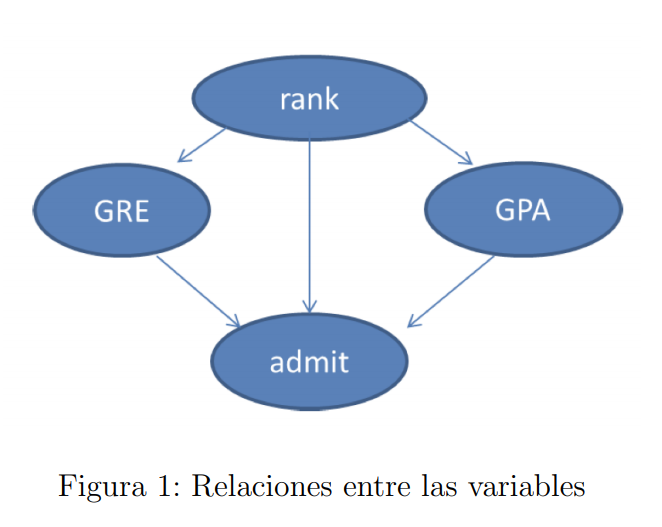

A continuacion se puede observar que se calculan: 
* $P(rank)$ 
* $P(GPA|rank)$
* $P(GRE|rank)$
* $P(adm|rank,GRE, GPA)$

In [ ]:
P_R 

,P(rank)
R=1,0.1525
R=2,0.3775
R=3,0.3025
R=4,0.1675


In [ ]:
gpa_R

,GPA = 1,GPA = 0
R=1,0.868852,0.131148
R=2,0.827815,0.172185
R=3,0.834711,0.165289
R=4,0.805970,0.194030


In [ ]:
gre_R

,GRE = 1,GRE = 0
R=1,0.819672,0.180328
R=2,0.814570,0.185430
R=3,0.793388,0.206612
R=4,0.791045,0.208955



$P(adm|rank,GRE, GPA) = \frac{P(adm,rank,GRE, GPA)}{P(rank,GRE, GPA)}$

Buscamos calcular: 

$P(adm=0|rank=1) = \frac{\sum_{i∈(0,1)}\sum_{j∈(0,1)}{P(adm=0,rank=1,GRE=i, GPA=j)}}{\sum_{i∈(0,1)}\sum_{j∈(0,1)}{P(rank=1,GRE=i, GPA=j)}}$

Por lo que, a continuacion se mostrara una tabla con los valores que puede tomar $P(adm,rank,GRE, GPA)$. 

Se aplico en el calculo la correccion de Laplace donde:

$p = \frac{cantidad \, de \, ocurrencias \, + \, 1}{total\, + \, k}$

In [ ]:
probabilidades_A_df

,admit,rank,gpa,gre,"P(A,R,gpa,gre)"
0,1,1,0,0,0.285714
1,0,1,0,0,0.714286
2,1,1,0,1,0.800000
3,0,1,0,1,0.200000
4,1,1,1,0,0.500000
5,0,1,1,0,0.500000
6,1,1,1,1,0.551020
7,0,1,1,1,0.448980
8,1,2,0,0,0.444444
9,0,2,0,0,0.555556


### Calculo de probabilidad para el 3.a:

$P(adm=0|rank=1) = \frac{\sum_{i∈(0,1)}\sum_{j∈(0,1)}{P(adm=0,rank=1,GRE=i, GPA=j)}}{\sum_{i∈(0,1)}\sum_{j∈(0,1)}{P(rank=1,GRE=i, GPA=j)}} =  0.465816$



### Calculo de probabilidad para 3.b
Como se discretizaron las variables anteriormente, se toma que GRE = 450 es equivalente a GRE = 0 y  GPA = 3.5, GPA = 1. Por lo que se puede ver que la probabilidad es:

$P(adm=1|rank=2, GRE = 0, GPA = 1) = \frac{P(adm=1,rank=2, GRE = 0, GPA = 1)}{P(rank=2, GRE = 0, GPA = 1)} = 0.190476$

Como se puede ver, este proceso de aprendizaje es un **proceso parametrico**. Desde un conjunto de datos observados, obtenidos a partir de *binary.csv* y la estructura de condiciones se estimaron las probabilidades a priori y condicionales del conjunto de datos. 
Se tuvo en cuenta que las frecuencias relativas no dieran cero, para ello se utilizo la correccion de Laplace. 

